# Assignment 2-2: A Simple Analysis of Film Reviews

## Preparation

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi']=440
%config InlineBackend.figure_format = 'svg'
font_path = "ASSIGNMENT_2_FILES/SiYuanSongTi.ttf"
fm.FontManager().addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)

In [2]:
df = pd.read_csv("ASSIGNMENT_2_FILES/reviews.csv", low_memory=False)
df

,movie_name,评论人,星级,评论时间,题目,评论内容,有用,没用,回应,yonghu_loc,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,变形金刚3的影评 (1590),漫科,1,2011/7/8 2:11,麦克贝你丫给我站住！ 3d眼镜柄狂插你眼！,这篇影评可能有剧透 很多人怕，说你不要写变3影...,2568,279,563回应,SNOWMAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,变形金刚3的影评 (1590),李胶囊,1,2011/7/8 2:11,迈克尔贝你这是作死啊,这篇影评可能有剧透 本戏的主要剧情进展表 开...,1651,150,483回应,"Firenze, Italy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,变形金刚3的影评 (1590),狒狒,1,2011/7/8 2:11,记念变形金刚3,真的猛士，敢于直面惨淡的人生，敢于正视推迟的档期。这是怎样的哀痛者和幸福者？然而上映又常常为...,566,142,120回应,江西南昌,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,变形金刚3的影评 (1590),KILL88,1,2011/7/8 2:11,看完变3来详细介绍出场的所有金刚，剧透了小心,买拷贝说，世界上有300个专家，上亿的粉丝，我拍这个电影是给粉丝看的，不是给那300个人看的...,292,25,57回应,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,变形金刚3的影评 (1590),木遥,1,2011/7/8 2:11,关于《变形金刚3》的几句话,1. 没有理由不看 3D IMAX 版。 2. 前半部分基本上可以看做是 Lenov...,329,74,151回应,"New York City, United States",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164516,不二神探的影评 (593),喂、帅哥,1,2013/6/23 0:07,何必以常理揣之？,第一次写长评，仅仅是觉得这么多一星有些冤枉了这部电影 的确，这算不上一部特别优秀的电影，剧情...,NaN,NaN,0回应,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164517,不二神探的影评 (593),豆子和老鼠,1,2013/6/23 0:07,电影，要看过才知道好不好,电影这东西，因为每个人口味不一样，所以只有自己看过，才知道自己是不是喜欢。 虽然昨天被坑，但...,NaN,NaN,0回应,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164518,不二神探的影评 (593),云清念缕,1,2013/6/23 0:07,【影评】也评不二神探——不妨止有书一束，二十年前晓寺情,这篇影评可能有剧透 〖开篇〗 6.21电影《不...,NaN,1,0回应,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164519,不二神探的影评 (593),浩南姐_私藏夏天,1,2013/6/23 0:07,明星 乐趣 清凉 女神全都有了你还等什么,这是一部适合全家，情侣，朋友一起看的电影，没错，其实就是老少皆宜 你能看到一向帅酷的李连杰变...,NaN,NaN,0回应,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 1: Count Reviews

**Task:** Collect the review count of all films, and use bar chart to display the 10 most reviewed films.

In [3]:
# Count the occurrences of rows in respect of 'movie_name'
comment_count_large = df['movie_name'].value_counts()

# Filter out top 10
top_10_film_names_salted = list(comment_count_large[0:10:1].index)
top_10_comment_count = list(comment_count_large[0:10:1].values)
print(top_10_film_names_salted)

# Process for film names
top_10_film_names = list(map(lambda x: x[0:x.find("的影评")], top_10_film_names_salted))
print(top_10_film_names)

['后会无期的影评 (7876)', '少年派的奇幻漂流的影评 (6816)', '致我们终将逝去的青春的影评 (7423)', '金陵十三钗的影评 (5508)', '老炮儿的影评 (5664)', '长城的影评 (5671)', '美人鱼的影评 (5529)', '西游记之大圣归来的影评 (4962)', '盗墓笔记的影评 (4854)', '搜索的影评 (4111)']
['后会无期', '少年派的奇幻漂流', '致我们终将逝去的青春', '金陵十三钗', '老炮儿', '长城', '美人鱼', '西游记之大圣归来', '盗墓笔记', '搜索']


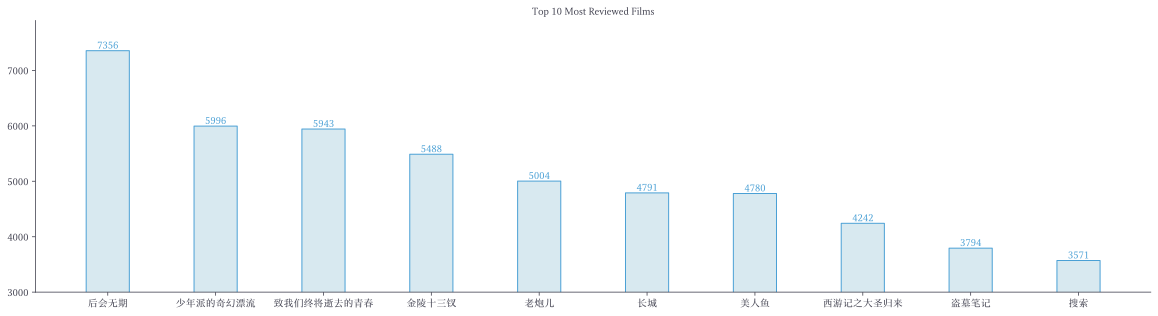

In [8]:
plt.figure(figsize=(20,5))
plt.title("Top 10 Most Reviewed Films", fontproperties=font_prop, color='#454553')
plt.ylim(3000, 7900)
plt.bar(top_10_film_names, top_10_comment_count, edgecolor='#4AA0D5', facecolor="#D8E9F0", width=0.4)
plt.xticks(list(range(10)), top_10_film_names, color='#454553', fontproperties=font_prop, rotation=0)
plt.yticks([3000, 4000, 5000, 6000, 7000], color='#454553', fontproperties=font_prop)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('#454553')
ax.spines['left'].set_color('#454553')
ax.tick_params(axis='x', color='#454553')
ax.tick_params(axis='y', color='#454553')
for x,y in zip(top_10_film_names, top_10_comment_count):
    plt.text(x,y,'%d'%y,ha="center",va="bottom", fontproperties=font_prop, color='#4AA0D5')

## Task 2: Weekly Reviews

**Task:** Find the film with the most reviews. Plot the review count **each week** using a line chart, where each week is a point on the graph.

During the creation of the graph, it is apparent that the first few days are the summit of the reviews. Thus, instead of using a linear tick on the $y$-axis, I used a logarithmic $y$-axis to prevent the curve from being so steady from day 10 and on.

In [5]:
from datetime import datetime
from datetime import timedelta

# Binary filter
comments = df[df['movie_name']=='后会无期的影评 (7876)']
# Collect dates
comments_date = comments['评论时间']
# Parse into datetime.datetime class
comments_date_time = list(map(
    lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M'),
    comments_date.values
))
# Sort and find minimum
comments_date_time.sort()
begin_date = comments_date_time[0]
# Get week count calculated
comments_week = list(map(
    lambda x: (x - begin_date).days // 7,
    comments_date_time
))
print(comments_week.count(2))

1140


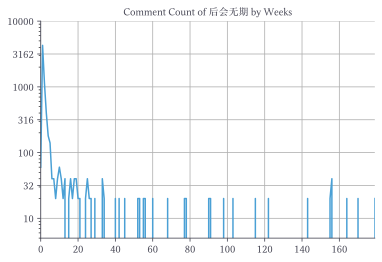

In [9]:
# Get ready for graph

# X-axis: week
begin_week = comments_week[0]
end_week = comments_week[-1]
# Y-axis: comments
comments_count_by_week = list(map(lambda x: comments_week.count(x), range(begin_week, end_week + 1)))

plt.yscale('log')
plt.xlim(begin_week, end_week)
plt.ylim(5, 5000)
plt.plot(comments_count_by_week, color='#4AA0D5')
plt.title('Comment Count of 后会无期 by Weeks', fontproperties=font_prop, color='#454553')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('#454553')
ax.spines['left'].set_color('#454553')
ax.tick_params(axis='x', color='#454553')
ax.tick_params(axis='y', color='#454553')
plt.xticks(range(0, 180, 20), color='#454553', fontproperties=font_prop)
plt.yticks(np.geomspace(10, 10000, 7), list(map(lambda x: int(round(x)), np.geomspace(10, 10000, 7))), color='#454553', fontproperties=font_prop)

plt.grid(True)